In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve, learning_curve

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cirhossis Dataset.csv')
data

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [3]:
data.shape

(418, 20)

In [4]:
data['Stage'].value_counts()

3.0    155
4.0    144
2.0     92
1.0     21
Name: Stage, dtype: int64

In [5]:
data.tail

<bound method NDFrame.tail of       ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly  \
0      1     400      D  D-penicillamine  21464   F       Y            Y   
1      2    4500      C  D-penicillamine  20617   F       N            Y   
2      3    1012      D  D-penicillamine  25594   M       N            N   
3      4    1925      D  D-penicillamine  19994   F       N            Y   
4      5    1504     CL          Placebo  13918   F       N            Y   
..   ...     ...    ...              ...    ...  ..     ...          ...   
413  414     681      D              NaN  24472   F     NaN          NaN   
414  415    1103      C              NaN  14245   F     NaN          NaN   
415  416    1055      C              NaN  20819   F     NaN          NaN   
416  417     691      C              NaN  21185   F     NaN          NaN   
417  418     976      C              NaN  19358   F     NaN          NaN   

    Spiders Edema  Bilirubin  Cholesterol  Albumin  Coppe

In [6]:
data.isnull().values.any()

True

<ipython-input-7-940e7800e0f6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasi = data.corr()


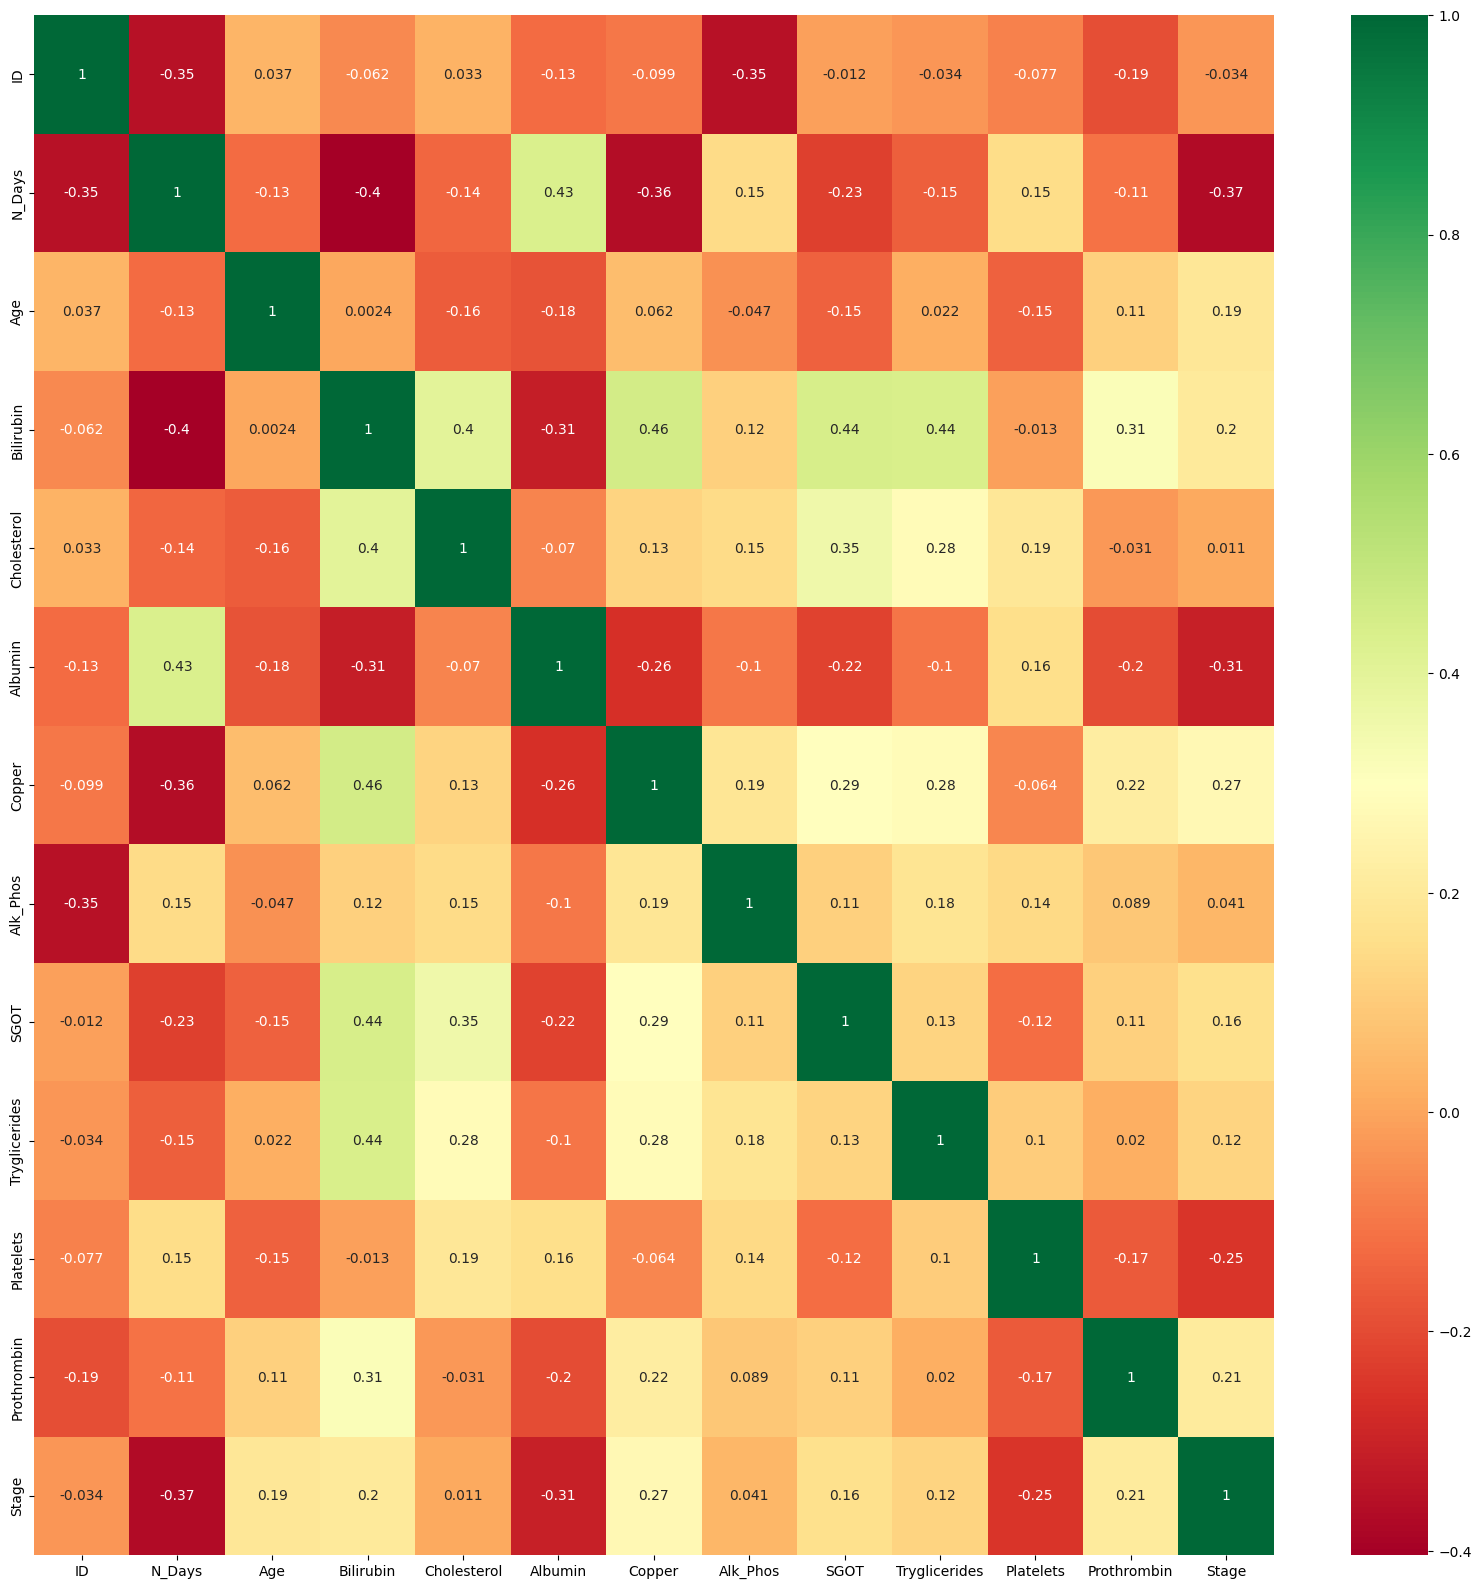

In [7]:
import seaborn as sns

korelasi = data.corr()
features = korelasi.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[features].corr(),annot=True,cmap="RdYlGn")

In [8]:
data.corr()

<ipython-input-8-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,1.000000,-0.354305,0.037136,-0.062154,0.032897,-0.128924,-0.098663,-0.352856,-0.012097,-0.034100,-0.076699,-0.191930,-0.033757
N_Days,-0.354305,1.000000,-0.125934,-0.403953,-0.138236,0.430829,-0.364809,0.149269,-0.225492,-0.153000,0.151361,-0.111470,-0.366193
Age,0.037136,-0.125934,1.000000,0.002362,-0.157620,-0.182350,0.061549,-0.047247,-0.149869,0.022065,-0.148201,0.113760,0.189083
Bilirubin,-0.062154,-0.403953,0.002362,1.000000,0.397129,-0.314177,0.456918,0.116984,0.441730,0.436748,-0.013435,0.314894,0.200731
Cholesterol,0.032897,-0.138236,-0.157620,0.397129,1.000000,-0.069733,0.126115,0.149473,0.353246,0.276830,0.191710,-0.030811,0.011164
Albumin,-0.128924,0.430829,-0.182350,-0.314177,-0.069733,1.000000,-0.264771,-0.101456,-0.220047,-0.103417,0.158659,-0.200592,-0.305296
Copper,-0.098663,-0.364809,0.061549,0.456918,0.126115,-0.264771,1.000000,0.187357,0.293829,0.279852,-0.064403,0.218224,0.269400
Alk_Phos,-0.352856,0.149269,-0.047247,0.116984,0.149473,-0.101456,0.187357,1.000000,0.112217,0.180082,0.143733,0.089384,0.041273
SGOT,-0.012097,-0.225492,-0.149869,0.441730,0.353246,-0.220047,0.293829,0.112217,1.000000,0.126119,-0.120147,0.112174,0.164945
Tryglicerides,-0.034100,-0.153000,0.022065,0.436748,0.276830,-0.103417,0.279852,0.180082,0.126119,1.000000,0.103212,0.020122,0.123899


In [9]:
data.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [10]:
#mengubah Kolom Age dari Hari menjadi Tahun
def get_age(age):
  return int(age/360)

data.Age = data.Age.apply(get_age)
data

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,59,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,57,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,71,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,55,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,67,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,39,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,57,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,58,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [11]:
#mengambil kolom Object
cat_features = []
lis = list(data.columns)
for i in lis:
    if data[i].dtype == "object":
        cat_features.append(i)
cat_features

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

In [12]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan,strategy="mean")
si.fit(data.iloc[:,10:-1])

data.iloc[:,10:-1] = si.transform(data.iloc[:,10:-1])

In [13]:
#CEK DATA NULL
data.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol        0
Albumin            0
Copper             0
Alk_Phos           0
SGOT               0
Tryglicerides      0
Platelets          0
Prothrombin        0
Stage              6
dtype: int64

In [14]:
data.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [15]:
lii = list(data["Status"])

In [16]:
#mengubah status golongan pasien
status = []
for i in range(len(lii)):
    if lii[i]=="D":
        status.append(0)
    elif lii[i]=="C":
        status.append(1)
    else :
        status.append(2)
status

[0,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 1,
 1,


In [17]:
data["status"] = status

In [18]:
data = data.drop(["Status"], axis=1)

In [19]:
data.head()

,ID,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,status
0,1,400,D-penicillamine,59,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,0
1,2,4500,D-penicillamine,57,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,1
2,3,1012,D-penicillamine,71,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,0
3,4,1925,D-penicillamine,55,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,0
4,5,1504,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,2


In [20]:
data.describe().transpose().style.background_gradient(cmap = 'GnBu')

,count,mean,std,min,25%,50%,75%,max
ID,418.000000,209.500000,120.810458,1.000000,105.250000,209.500000,313.750000,418.000000
N_Days,418.000000,1917.782297,1104.672992,41.000000,1092.750000,1730.000000,2613.500000,4795.000000
Age,418.000000,50.923445,10.568669,26.000000,43.000000,51.000000,59.000000,79.000000
Bilirubin,418.000000,3.220813,4.407506,0.300000,0.800000,1.400000,3.400000,28.000000
Cholesterol,418.000000,369.510563,191.077413,120.000000,273.000000,369.510563,369.510563,1775.000000
Albumin,418.000000,3.497440,0.424972,1.960000,3.242500,3.530000,3.770000,4.640000
Copper,418.000000,97.648387,73.697982,4.000000,51.250000,97.648387,100.750000,588.000000
Alk_Phos,418.000000,1982.655769,1848.437803,289.000000,1016.250000,1717.000000,1982.655769,13862.400000
SGOT,418.000000,122.556346,48.965657,26.350000,91.000000,122.556346,135.750000,457.250000
Tryglicerides,418.000000,124.702128,53.479887,33.000000,95.000000,124.702128,127.750000,598.000000


In [21]:
cirhossis_true_count =len(data.loc[data['Stage']==1])
cirhossis_false_count = len(data.loc[data['Stage']==0])

In [22]:
#view
(cirhossis_true_count,cirhossis_false_count)

(21, 0)

In [23]:
#Missing value
print('total number of rows : {0}'.format(data.shape[0]))
print('total number of columns : {0}'.format(data.shape[1]))

total number of rows : 418
total number of columns : 20


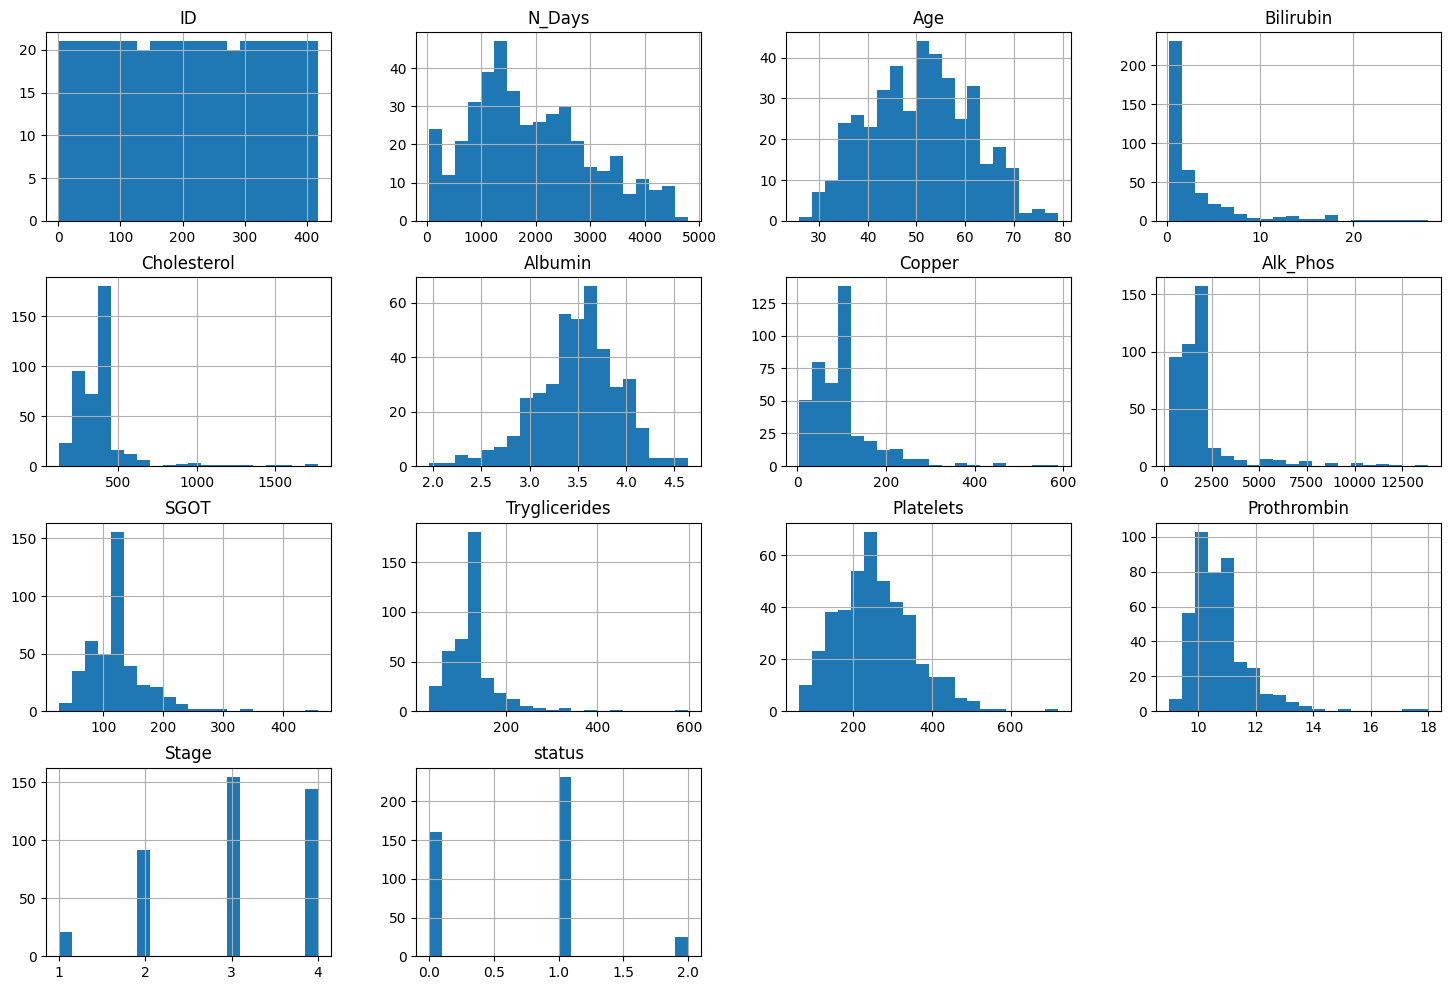

In [24]:
data.hist(bins=20, figsize=(18,12))
plt.show()

In [25]:
sns.pairplot(data,hue='Stage',palette='magma',height=3.5)
plt.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

In [26]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [27]:
X

array([[400, 'D-penicillamine', 59, ..., 190.0, 12.2, 4.0],
       [4500, 'D-penicillamine', 57, ..., 221.0, 10.6, 3.0],
       [1012, 'D-penicillamine', 71, ..., 151.0, 12.0, 4.0],
       ...,
       [1055, nan, 57, ..., 143.0, 9.9, 3.0],
       [691, nan, 58, ..., 269.0, 10.4, 3.0],
       [976, nan, 53, ..., 350.0, 10.6, 4.0]], dtype=object)

In [28]:
y

array([0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1,
       0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1,

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [30]:
X_train

array([[2286, nan, 56, ..., 141.0, 10.0, nan],
       [4523, 'Placebo', 54, ..., 286.0, 10.6, 4.0],
       [3358, 'Placebo', 47, ..., 225.0, 11.5, 4.0],
       ...,
       [1569, 'Placebo', 51, ..., 289.0, 9.7, 3.0],
       [2855, nan, 54, ..., 249.0, 10.3, 2.0],
       [110, 'Placebo', 49, ..., 110.0, 11.1, 4.0]], dtype=object)

In [31]:
X_train.shape

(334, 18)

In [32]:
y_train.shape

(334,)

In [33]:
X_test

array([[2011, nan, 64, ..., 139.0, 10.5, nan],
       [4795, nan, 34, ..., 257.02457002457004, 18.0, 2.0],
       [1581, nan, 67, ..., 165.0, 10.0, 4.0],
       ...,
       [4127, 'Placebo', 45, ..., 324.0, 11.3, 2.0],
       [131, 'D-penicillamine', 54, ..., 283.0, 12.4, 4.0],
       [2769, 'Placebo', 52, ..., 261.0, 10.0, 3.0]], dtype=object)

In [34]:
y_train

array([0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 2, 0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,

In [35]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

print(f'Dimensi Feature: {X.shape}')
print(f'Class: {set(y)}')

Dimensi Feature: (150, 4)
Class: {0, 1, 2}


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

In [37]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,
                              random_state=0)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [38]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [39]:
Random_model = RandomForestClassifier()

In [40]:
Random_model.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
random_prediction = Random_model.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,random_prediction))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [43]:
print(classification_report(y_test,random_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [44]:
import pickle

pickle.dump(Random_model,open('RandomForestClassification.pkl', 'wb'))

In [45]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00


In [46]:
! pip install pandas-profiling==3.2.0
! pip install ydata-profiling
! pip install streamlit-pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 35.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ef9030d0786e80c6529ee7840333e8874095950d2f436f0a64bb3364eb485861
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: joblib
    Found existing installation: joblib 1.3.2
    Uninstalling joblib-1.3.2:
      Successfully uninstalled joblib-1.3.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.13
    Uninstalling pydantic-1.10.13:
      Successfully uninstalled pydantic-1.10.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dep

In [47]:
%%writefile app.py
import streamlit as st
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport
from streamlit_pandas_profiling import st_profile_report
import seaborn as sns
import pickle

#import model
rfc = pickle.load(open('RandomForestClassification.pkl','rb'))

#load dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cirhossis Dataset.csv')
#data = data.drop(data.columns[0],axis=1)

st.title('Aplikasi Deteksi Penyakit Hati')

html_layout1 = """
<br>
<div style="background-color:red ; padding:2px">
<h2 style="color:white;text-align:center;font-size:35px"><b>Cirhossis Checkup</b></h2>
</div>
<br>
<br>
"""
st.markdown(html_layout1,unsafe_allow_html=True)
activities = ['Random Forest Clasification']
option = st.sidebar.selectbox('Pilihan mu ?',activities)
st.sidebar.header('Data Pasien')

if st.checkbox("Tentang Dataset"):
    html_layout2 ="""
    <br>
    <p>Ini adalah dataset PIMA Indian</p>
    """
    st.markdown(html_layout2,unsafe_allow_html=True)
    st.subheader('Dataset')
    st.write(data.head(10))
    st.subheader('Describe dataset')
    st.write(data.describe())

sns.set_style('darkgrid')

if st.checkbox('EDa'):
    pr =ProfileReport(data,explorative=True)
    st.header('**Input Dataframe**')
    st.write(data)
    st.write('---')
    st.header('**Profiling Report**')
    st_profile_report(pr)

#train test split
X = data.drop('Stage',axis=1)
y = data['Stage']
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

#Training Data
if st.checkbox('Train-Test Dataset'):
    st.subheader('X_train')
    st.write(X_train.head())
    st.write(X_train.shape)
    st.subheader("y_train")
    st.write(y_train.head())
    st.write(y_train.shape)
    st.subheader('X_test')
    st.write(X_test.shape)
    st.subheader('y_test')
    st.write(y_test.head())
    st.write(y_test.shape)

def user_report():
    N_Days = st.sidebar.slider('N_Days',0,20,1)
    Age = st.sidebar.slider(' Age',0,200,108)
    Bilirubin = st.sidebar.slider('Bilirubin',0,140,40)
    Cholesterol = st.sidebar.slider('Cholesterol',0,100,25)
    Albumin = st.sidebar.slider('Albumin',0,1000,120)
    Copper = st.sidebar.slider('Copper',0,80,25)
    Alk_Phos	 = st.sidebar.slider('Alk_Phos', 0.05,2.5,0.45)
    SGOT = st.sidebar.slider('SGOT',21,100,24)
    Tryglicerides = st.sidebar.slider('Tryglicerides',21,100,24)
    Platelets = st.sidebar.slider('Platelets',21,100,24)
    Prothrombin	= st.sidebar.slider('Prothrombin',21,100,24)
    Stage = st.sidebar.slider('Stage',21,100,24)

    user_report_data = {
        'N_Days':N_Days,
        'Age':Age,
        'Bilirubin': Bilirubin,
        'Cholesterol':Cholesterol,
        'Albumin':Albumin,
        'Copper':Copper,
        'Alk_Phos':Alk_Phos,
        'SGOT':SGOT,
        'Tryglicerides':Tryglicerides,
        'Platelets':Platelets,
        'Prothrombin':Prothrombin,
        'Stage':Stage
    }
    report_data = pd.DataFrame(user_report_data,index=[0])
    return report_data

#Data Pasion
user_data = user_report()
st.subheader('Data Pasien')
st.write(user_data)

user_result = rfc.predict(user_data)
rfc_score = accuracy_score(y_test,rfc.predict(X_test))

#output
st.subheader('Hasilnya adalah : ')
output=''
if user_result[0]==0:
    output='Kamu Aman'
else:
    output ='Kamu terkena liver'
st.title(output)
st.subheader('Model yang digunakan : \n'+option)
st.subheader('Accuracy : ')
st.write(str(rfc_score*100)+'%')


Writing app.py


In [48]:
! wget -q -O - ipv4.icanhazip.com

34.16.169.219


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501



npx: installed 22 in 4.415s
your url is: https://chubby-chefs-stare.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.169.219:8501

/content/app.py:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
2024-01-12 13:47:13.272 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 535, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 111, in <module>
    user_result = rfc.predict(user_data)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 820, in